In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv('forestfires.csv')

In [10]:
df.head()
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data)) 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


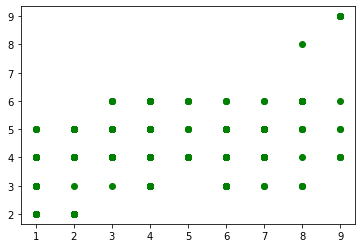

In [13]:
plt.plot(df['X'], df['Y'], 'go')

In [18]:
df['area'].nunique()

251

In [26]:
y = df['area']
Y = y.to_numpy()
Y = Y.reshape((len(Y), 1))
Y.shape

(517, 1)